<a href="https://colab.research.google.com/github/YuriEvan/ADALL_github/blob/main/21Jan26_DecisionTree_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

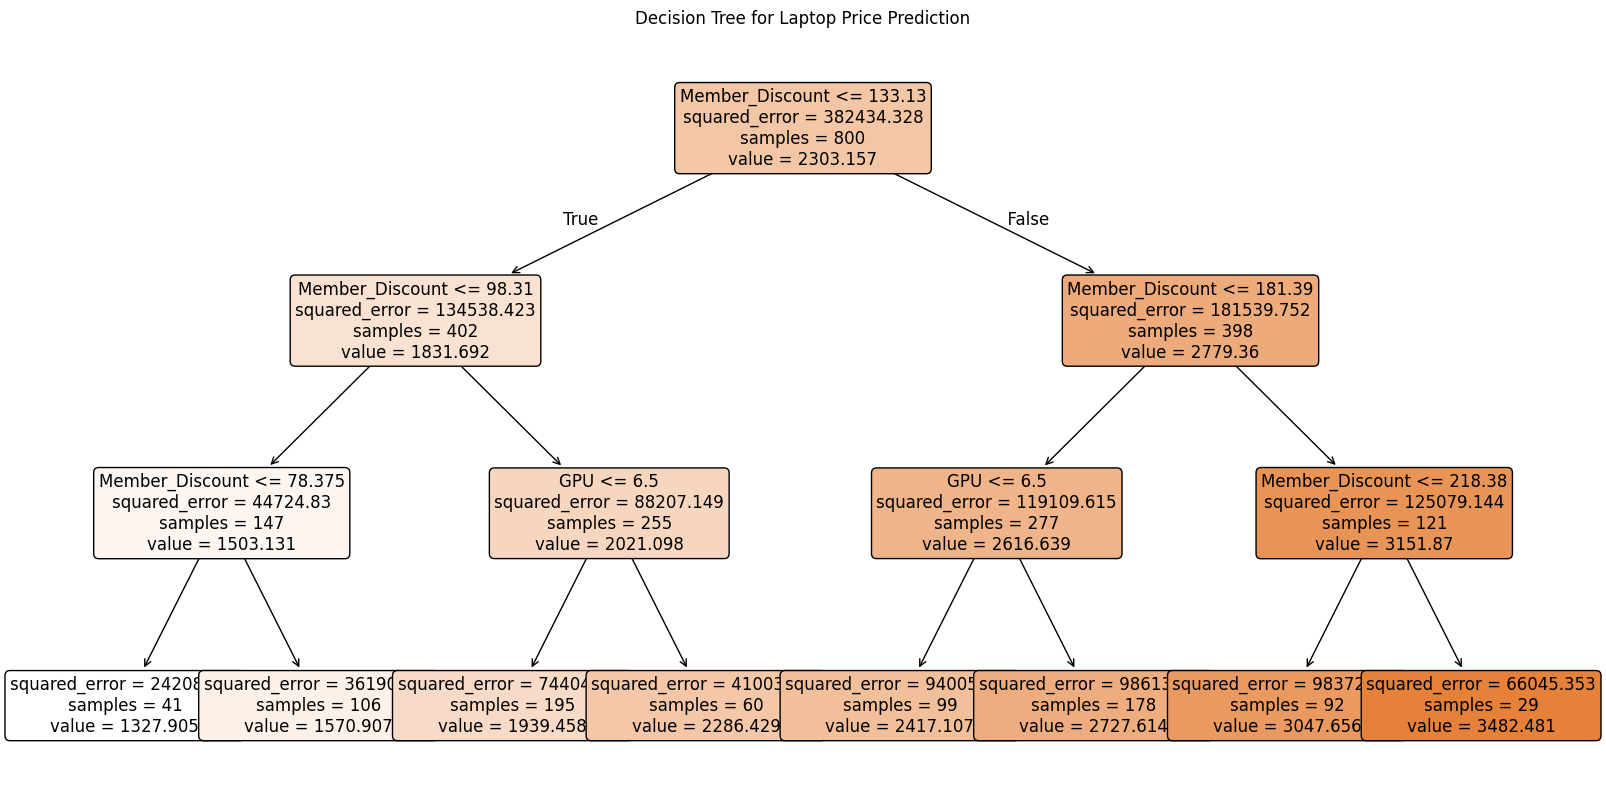

Model Training Score: 0.81
Model Testing Score: 0.77


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import LabelEncoder

# 1. Load the dataset
url = "https://raw.githubusercontent.com/YuriEvan/ADALL_github/main/laptop_prices_2024_sgd_TL.csv"
df = pd.read_csv(url)

# 2. Preprocessing
# Typically, these datasets contain columns like 'Brand', 'Processor', 'RAM', 'Storage', and 'Price_SGD'
# We need to encode categorical strings into numbers for the machine learning model
le = LabelEncoder()

# Identifying categorical columns (e.g., Company, Typename, Cpu, OpSys)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Define Features (X) and Target (y)
# Assuming 'Price_SGD' is the target column based on the filename
target_col = 'Price_SGD' if 'Price_SGD' in df.columns else df.columns[-1]
X = df.drop(columns=[target_col])
y = df[target_col]

# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize and Train Decision Tree
# We limit max_depth so the tree remains readable
dtree = DecisionTreeRegressor(max_depth=3, random_state=42)
dtree.fit(X_train, y_train)

# 5. Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dtree,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Decision Tree for Laptop Price Prediction")
plt.show()

# Output Model Performance
print(f"Model Training Score: {dtree.score(X_train, y_train):.2f}")
print(f"Model Testing Score: {dtree.score(X_test, y_test):.2f}")